In [14]:
import pickle
pickle.HIGHEST_PROTOCOL = 2
from pympler import asizeof

import sys, os
sys.path.append(os.path.join("..", "Libraries","QML_lib"))
import Evo as evo
import DataBase 
from QMD import QMD #  class moved to QMD in Library
from QML import *

In [2]:
qmd=pickle.load(open("qmd_class.npy", "rb"))

In [3]:
qmd.db

,<Name>,Completed,Epoch_Start,ModelID,Model_Class_Instance,Operator_Instance,Reduced_Model_Class_Instance,Status,branchID
0,x,0.0,0.0,0.0,<QML.ModelLearningClass object at 0x7f8943382518>,<DataBase.operator object at 0x7f8943329198>,<QML.learnedQML object at 0x7f89433292e8>,Active,0.0
1,y,0.0,0.0,1.0,<QML.ModelLearningClass object at 0x7f894338b390>,<DataBase.operator object at 0x7f89433291d0>,<QML.learnedQML object at 0x7f8943329390>,Active,0.0
2,z,0.0,0.0,2.0,<QML.ModelLearningClass object at 0x7f8943391978>,<DataBase.operator object at 0x7f8943329208>,<QML.learnedQML object at 0x7f89433293c8>,Active,0.0
3,xTy,0.0,0.0,3.0,<QML.ModelLearningClass object at 0x7f8943394f60>,<DataBase.operator object at 0x7f8943329240>,<QML.learnedQML object at 0x7f8943329438>,Active,0.0
4,xTz,0.0,0.0,4.0,<QML.ModelLearningClass object at 0x7f894331e588>,<DataBase.operator object at 0x7f8943329278>,<QML.learnedQML object at 0x7f89433294a8>,Active,0.0
5,yTz,0.0,0.0,5.0,<QML.ModelLearningClass object at 0x7f8943322b70>,<DataBase.operator object at 0x7f89433292b0>,<QML.learnedQML object at 0x7f8943329518>,Active,0.0


In [4]:
y = qmd.getModelInstance('y')

In [23]:
y.TrackTime

array([ 2.07539134,  2.51934911])

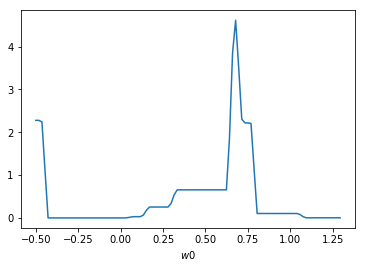

In [25]:
y.Updater.plot_posterior_marginal()

In [20]:
asizeof.asizeof(info['final_params'])

128

In [5]:
info = y.learned_info_dict()

In [6]:
l = learnedQML(model_name = 'y', 
           sim_oplist = y.SimOpList, 
           true_oplist=y.TrueOpList,
           true_params = y.TrueParams,
           numparticles = y.NumParticles,
           qle=y.QLE,
           modelID = y.ModelID,
           resample_thresh = 0.5, 
           resample_a = 0.9
          )

In [7]:
l.updateLearnedValues(info)

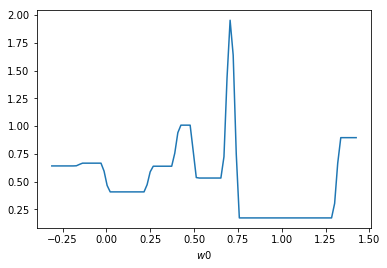

In [27]:
l.Updater.plot_posterior_marginal()

In [ ]:
from pympler import asizeof

In [ ]:
asizeof.asizeof(essential_model_info)

In [ ]:
y.SimParams

In [ ]:
y.FinalParams

In [ ]:
import numpy as np
np.array([[y.FinalParams[0,0]]])

In [ ]:
asizeof.asizeof(y.Updater.prior)

In [ ]:
asizeof.asizeof(y.Updater)

In [ ]:
essential_model_info = {}
mod = y

essential_model_info['name'] = mod.Name
essential_model_info['times'] = mod.TrackTime
essential_model_info['FinalParams'] = mod.FinalParams
essential_model_info['normalization_record'] = mod.Updater.normalization_record
essential_model_info['ModelID'] = mod.ModelID
essential_model_info['final_prior'] = 

In [ ]:
pickle.dump(essential_model_info, open("test_essential_size", "wb"))

In [ ]:
u=y.Updater

In [ ]:
pickle.dump(u, open("test_updater_size", "wb"))

In [ ]:
model = u.model
n_p=u.n_particles
pr = u.prior
nm = u.normalization_record

In [ ]:
import qinfer
newupd = qinfer.SMCUpdater(model, n_p, pr)

In [ ]:
newupd.normalization_record.__setattr__(normalization_record)

In [ ]:
newupd._normalization_record =nm

In [ ]:
newupd.normalization_record

In [ ]:
setattr(newupd, 'normalization_record', nm)

In [ ]:
y.QLE

In [ ]:
setattr(y, )

In [ ]:
qmd.compareModels(name_a='x', name_b='y')

In [ ]:
qmd.TrueOpName

In [ ]:
x = qmd.getModelInstance('x')

In [ ]:
x.BayesFactors

In [ ]:
y = qmd.getModelInstance('y')
y.BayesFactors

In [ ]:
z = qmd.getModelInstance('z')
a = z.BayesFactors

In [ ]:
import numpy as np

In [ ]:
np.sum( np.array(a[0]) < 1)

In [ ]:
qmd.BranchRankings

In [ ]:
qmd.BayesFactorsByBranch

In [ ]:
scores = {}
mods = ['x', 'y', 'z']
for name in mods:
    mod = qmd.getModelInstance(name)
    

In [ ]:
mod_ids = DataBase.list_model_id_in_branch(qmd.db, 0)
#tally = np.zeros(len(mod_ids))

tally = {}

for i in mod_ids:
    tally[int(i)] = 0
    mod = qmd.getModelInstanceFromID(i)
    scores = mod.BayesFactors
    for j in mod_ids:
        if i != j:
            #tally[i]
            comparison = np.array(scores[j]) > 1
            points = np.sum(comparison)
            tally[int(i)] += points
           # tally_dict[int(i)] += points

In [ ]:
tally

In [ ]:
tally_dict

In [ ]:
tally[0] += 10

In [ ]:
tally

In [ ]:
mylist = np.array([1,2,3])
v=np.sum(mylist)

In [ ]:
type(v)

In [ ]:
tally[1]+=v

In [ ]:
x.Updater